# “Фреймворк PyTorch для разработки искусственных нейронных сетей”

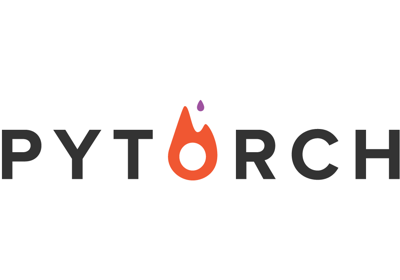

### План курса:
1. Введение в PyTorch. Тензоры, автодифференцирование
2. Feed-forward нейронные сети на Pytorch
3. Dataloader, Dataset в Pytorch. Продвинутые методы оптимизации
4. Сверточные сети в Pytorch. Классификация изображений. Предобученные сети в Pytorch
5. Составная лосс-функция. Сегментация изображений.
6. Сверточные сети применительно к текстовым задачам. Эмбеддинг-слои. Классификация новостей одномерными свертками.
7. Рекурентные нейронные сети. GRU, LSTM на Pytorch. Задача NER.
8. GAN на Pytorch.
9. Bert и Transformer на Pytorch
10. Face Detection and Emotion Recognition

# PyTorch, вводное занятие

### План занятия:
* Tensorflow vs PyTorch
* Установка
* Понятие Тензора
* Основы работы с тензорами
* Принципы автодифференцирования
* Градиент
* Оптимизация функции градиентным спуском
* Пара слов о CUDA и GPU 

###  Tensorflow vs PyTorch:

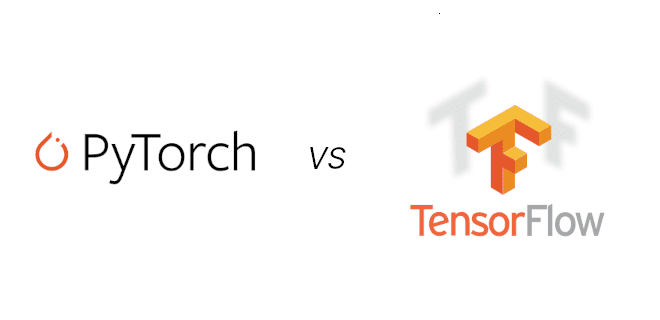

* GPU и TPU
* Отладка
* Определение графа - верно для старых версий, в Октябре 2019 года добавили поддержку подобного стиля программирования 

#### Различия:
https://towardsdatascience.com/pytorch-vs-tensorflow-in-2020-fe237862fae1
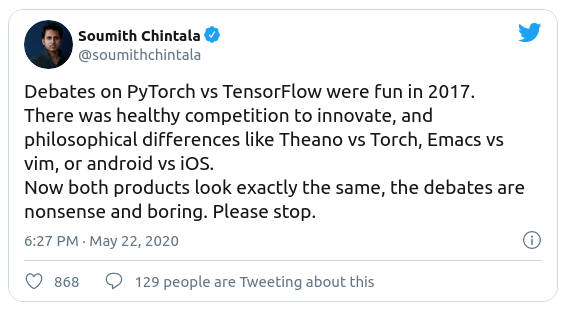

### Важные источники

* https://pytorch.org/tutorials/

* https://discuss.pytorch.org/

* https://stackoverflow.com/ :)

### Установка

### https://pytorch.org/

In [2]:
!pip install torch torchvision

### Подключение 

In [3]:
import torch
import torchvision

### Некоторые основы и пару слов о  numpy

In [4]:
import numpy as np

Pytorch позволяет делать многие вещи так же, как и numpy. Это означает, что вы можете получить значение тензора в любой момент времени. Но так же, обратите внимание на некоторые отличия. Полная таблица расхождений расположена здесь: 
* https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

In [5]:
x = np.arange(9).reshape(3, 3)

print("X :\n%s\n" % x)
print("X размеры : %s\n" % (x.shape,))
print("X тип : %s\n" % (type(x)))
# print("Добавим 10 :\n%s\n" % (x + 10))
# print("Среднее по строчке :\n%s\n" % (x.mean(axis=-1)))
# print("Среднее по столбцу :\n%s\n" % (x.mean(axis=0)))

X :
[[0 1 2]
 [3 4 5]
 [6 7 8]]

X размеры : (3, 3)

X тип : <class 'numpy.ndarray'>



##### PyTorch поддерживает разные типы тензоров:

* HalfTensor: 16-bit float
* FloatTensor: 32-bit float (torch.Tensor)
* DoubleTensor: 64-bit float

* ShortTensor: 16-bit int
* IntTensor: 32-bit int
* LongTensor: 64-bit int



#####  Весь список:
* https://pytorch.org/docs/stable/tensors.html

##### Функция для вывода данных о тензоре:

In [6]:
def print_tens_info(tensor):
    print("X :\n%s\n" % tensor)
    print("X количество измерений:\n%s\n" % tensor.dim())
    print("X размеры : ",  tensor.size())
    print("X тип : %s\n" % (tensor.type()))
#     print("Добавим 10 :\n%s\n" % (tensor + 10))
#     print("Среднее по строчке :\n%s\n" % (tensor.mean(axis=-1)))
#     print("Среднее по столбцу :\n%s\n" % (tensor.mean(axis=0)))
    

In [7]:
# y = np.arange(9).reshape(3, 3).astype(float)
# x = torch.tensor(y)  
# x = torch.DoubleTensor(3, 3, 3)
x = torch.LongTensor([[1.0, 2.0],[2.0,3.0]])  

In [8]:
print_tens_info(x)

X :
tensor([[1, 2],
        [2, 3]])

X количество измерений:
2

X размеры :  torch.Size([2, 2])
X тип : torch.LongTensor



In [9]:
x = torch.arange(9).view(3,3) 
x = torch.arange(0,9).view(3,3).type(torch.float32)
# y = np.arange(9).reshape(3, 3).astype(float)

In [10]:
print_tens_info(x)

X :
tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

X количество измерений:
2

X размеры :  torch.Size([3, 3])
X тип : torch.FloatTensor



#####  Из numpy в tensor и обратно

In [11]:
x = x.numpy()
print("X :\n%s\n" % x)
print("X размеры : %s\n" % (x.shape,))
print("X тип : %s\n" % (type(x)))
# print("Добавим 10 :\n%s\n" % (x + 10))
# print("Среднее по строчке :\n%s\n" % (x.mean(axis=-1)))
# print("Среднее по столбцу :\n%s\n" % (x.mean(axis=0)))

X :
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]

X размеры : (3, 3)

X тип : <class 'numpy.ndarray'>



In [12]:
x = torch.randn(3, 3)
print_tens_info(x)

X :
tensor([[ 0.4300, -0.4931, -2.0721],
        [-0.9319,  0.0303, -0.3277],
        [ 0.1252, -0.7440,  0.4124]])

X количество измерений:
2

X размеры :  torch.Size([3, 3])
X тип : torch.FloatTensor



#####  Некоторые отличия:

* ```x.astype('int64') -> x.type(torch.LongTensor)```
* ``` np.concatenate ->	torch.cat ```
* ``` np.multiply ->	torch.cmul ```
* ``` np.copy(x) ->	x:clone() ```


### Градиент

$$a = (b + c)*(c + 2) $$
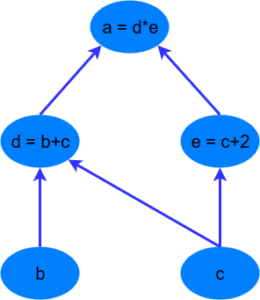

In [13]:
from torch.autograd import Variable

In [14]:
torch.ones(3)

tensor([1., 1., 1.])

In [15]:
x = Variable(torch.ones(3), requires_grad = True)

#### requires_grad 
Флаг, что необходимо автоматически вычислять градиент на тензоре при вызове функции .backward(). Если стоит False - градиент не нужен, обучение не происходит. 
Пример:

In [16]:
print_tens_info(x)

X :
tensor([1., 1., 1.], requires_grad=True)

X количество измерений:
1

X размеры :  torch.Size([3])
X тип : torch.FloatTensor



In [17]:
print(x.grad)

None


In [18]:
z = (x * x) + 5.0 * x #задание - посчитать производную ручками

In [19]:
print_tens_info(z)

X :
tensor([6., 6., 6.], grad_fn=<AddBackward0>)

X количество измерений:
1

X размеры :  torch.Size([3])
X тип : torch.FloatTensor



In [20]:
z.backward(torch.ones(3))

In [21]:
print(x.grad)

tensor([7., 7., 7.])


#### Подключаемые модули

In [22]:
from torch import nn 
from torch import optim

* nn - формирование вычислительных графов для слоев нейронных сетей. TensorFlow: Keras.
* optim - алгоритмы оптимизации (SGD, Adam и т.д.). TensorFlow: модуль optimizers

In [23]:
linear = nn.Linear(2, 2)

In [24]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.3371, -0.5235],
        [ 0.6529,  0.1501]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.5275, -0.3178], requires_grad=True)


In [25]:
criterion = nn.MSELoss()

In [26]:
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [27]:
x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)

In [28]:
optimizer.zero_grad()
pred = linear(x)
loss = criterion(pred, y)
print('loss: ', loss.item())

loss:  2.1424779891967773


In [29]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  None
dL/db:  None


In [30]:
loss.backward()

In [31]:
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

dL/dw:  tensor([[-1.5548, -1.0231],
        [ 2.8946,  1.9047]])
dL/db:  tensor([ 0.9795, -1.8236])


In [32]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.3371, -0.5235],
        [ 0.6529,  0.1501]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.5275, -0.3178], requires_grad=True)


In [33]:
optimizer.step()

In [34]:
print ('w: ', linear.weight)
print ('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.3527, -0.5133],
        [ 0.6239,  0.1310]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.5177, -0.2995], requires_grad=True)


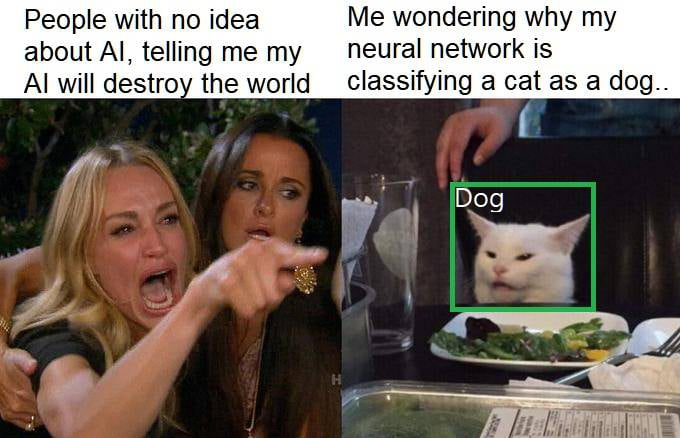

# Попрактикуемся с более привычными функциями

In [ ]:
# функция 

#### Подключение GPU 

In [49]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [50]:
torch.randn(10, 10, device=device)

tensor([[-1.1673e+00, -4.4547e-01,  1.0386e+00, -8.7516e-01, -3.5741e-01,
          8.5138e-01, -1.1577e+00,  1.3708e+00, -5.2753e-01, -5.3392e-01],
        [ 1.5675e-03, -3.4978e-01,  1.6073e+00, -1.7114e+00,  3.8542e-02,
          3.1676e-01,  4.4632e-01, -1.1929e+00,  5.2055e-03, -6.4465e-01],
        [ 1.4146e+00, -1.1439e-01,  1.2020e+00, -1.3957e-01, -1.9631e+00,
          2.6970e-01, -6.7097e-01, -1.0678e+00,  8.9411e-01,  5.5723e-01],
        [ 2.0426e-01,  1.3255e+00, -1.0611e+00, -3.0638e-01, -1.8725e-01,
          5.4164e-01, -8.1759e-01,  1.0486e-01,  9.1875e-03, -2.4288e+00],
        [-9.6765e-01, -1.0468e+00,  1.6859e-01,  1.0626e+00, -5.5881e-01,
          3.3930e-01, -1.7819e-01, -4.2448e-01, -1.3382e+00, -5.8529e-01],
        [ 1.2879e+00, -3.0908e-01,  5.6328e-01, -1.2010e+00,  1.4069e+00,
          4.3076e-01, -6.8986e-01,  1.5604e+00, -4.8704e-01, -2.0964e+00],
        [ 8.8558e-01, -4.8685e-01,  2.9001e-01,  1.5581e+00, -1.3618e+00,
          1.5163e+00,  6.4413e-0

In [51]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)